In [20]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
from wordcloud import WordCloud
from konlpy.tag import Mecab
mecab=Mecab()
from collections import Counter
from gensim.models import CoherenceModel
from gensim import corpora
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

In [2]:
df=pd.read_csv("./data/fintech_news3.csv")
df

,날짜,제목,원문링크,뉴스본문
0,2025-11-19,"한국핀테크지원센터, ‘제18회 대한민국소통어워즈’에서 2년 연속 3개 부문 대상 수상",https://www.joongang.co.kr/article/25383037,NaN
1,2025-11-19,[한국핀테크지원센터] 2025 핀테크 전문가(개발자) 과정 ‘FinBoost Aca...,https://fintech.or.kr/web/board/boardContentsV...,한국핀테크지원센터는 핀테크 산업 성장에 기여하고자 최신트렌드를 반영한 교육과정을 기...
2,2025-11-19,[한국핀테크산업협회] 네트워킹 행사 '핀테크 커넥팅 데이 2025' 개최(11.26...,https://fintech.or.kr/web/board/boardContentsV...,"안녕하세요. 핀테크산업협회 사무국입니다.협회는 핀테크 기업과 금융기관, AFA 등 ..."
3,2025-11-19,[한국핀테크지원센터] (온라인) 핀테크를 통한 금융 AI 트렌드와 혁신 사례 교육생...,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요. 한국핀테크지원센터입니다.2025년 금융특화 계층별 AI역량강화 과정 ‘...
4,2025-11-19,[한국핀테크지원센터] 2025년 핀테크기업 온라인 채용관 (사람인 saramin) ...,https://fintech.or.kr/web/board/boardContentsV...,2025년‘핀테크기업 온라인 채용관’ (사람인 saramin) 참여 기업 모집 ...
...,...,...,...,...
11746,2024-12-16,수렁에 빠진 중국 경제... “몰락 중산층 2000만명 우버 택시로 몰렸다”,https://n.news.naver.com/mnews/article/023/000...,"\n\n[온차이나]중국 민간 경제 전문가들 “통계보다 훨씬 더 나쁘고, 성장시대 ..."
11747,2024-12-16,"""관세 폭탄 때문에 내년엔 더 비싸""…생필품·가전 등 사재기 열풍 부는 美",https://n.news.naver.com/mnews/article/277/000...,"\n\nWSJ ""사재기가 인플레이션 부추길 수도"" 지적미국의 일부 소비자들이 도널드..."
11748,2024-12-16,"구글·메타 등과 AI칩 합작… 브로드컴, 엔비디아 대항마로",https://n.news.naver.com/mnews/article/023/000...,\n\n시총도 1조달러 돌파\n\n\n\n\t\t\t\t\t\t\t\t\t\t미국 ...
11749,2024-12-16,"美, 중국의 중동·동남아 통한 AI 반도체 우회 조달도 막는다",https://n.news.naver.com/mnews/article/023/000...,\n\n수출 물량 상한제 추진\t\t\t\t\t\t\t미국 정부가 국가 안보를 이유...


In [3]:
def text_clean(x):
    # 한글, 영문 대소문자, 숫자만 남기고 모두 제거
    cleaned=re.sub(r'[^가-힣a-zA-Z0-9]'," ",x)
    cleaned=cleaned.replace("  "," ").replace("  "," ").strip()
    return cleaned

In [4]:
df=df.dropna()
df

,날짜,제목,원문링크,뉴스본문
1,2025-11-19,[한국핀테크지원센터] 2025 핀테크 전문가(개발자) 과정 ‘FinBoost Aca...,https://fintech.or.kr/web/board/boardContentsV...,한국핀테크지원센터는 핀테크 산업 성장에 기여하고자 최신트렌드를 반영한 교육과정을 기...
2,2025-11-19,[한국핀테크산업협회] 네트워킹 행사 '핀테크 커넥팅 데이 2025' 개최(11.26...,https://fintech.or.kr/web/board/boardContentsV...,"안녕하세요. 핀테크산업협회 사무국입니다.협회는 핀테크 기업과 금융기관, AFA 등 ..."
3,2025-11-19,[한국핀테크지원센터] (온라인) 핀테크를 통한 금융 AI 트렌드와 혁신 사례 교육생...,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요. 한국핀테크지원센터입니다.2025년 금융특화 계층별 AI역량강화 과정 ‘...
4,2025-11-19,[한국핀테크지원센터] 2025년 핀테크기업 온라인 채용관 (사람인 saramin) ...,https://fintech.or.kr/web/board/boardContentsV...,2025년‘핀테크기업 온라인 채용관’ (사람인 saramin) 참여 기업 모집 ...
5,2025-11-19,"금융위, 5대 금융지주 불러모아 “포용금융 적극 역할” 당부",https://n.news.naver.com/mnews/article/016/000...,"\n\n‘포용금융 소통·점검회의’ 개최기관별 지원현황, 준비상황 점검\n\n\n\n..."
...,...,...,...,...
11746,2024-12-16,수렁에 빠진 중국 경제... “몰락 중산층 2000만명 우버 택시로 몰렸다”,https://n.news.naver.com/mnews/article/023/000...,"\n\n[온차이나]중국 민간 경제 전문가들 “통계보다 훨씬 더 나쁘고, 성장시대 ..."
11747,2024-12-16,"""관세 폭탄 때문에 내년엔 더 비싸""…생필품·가전 등 사재기 열풍 부는 美",https://n.news.naver.com/mnews/article/277/000...,"\n\nWSJ ""사재기가 인플레이션 부추길 수도"" 지적미국의 일부 소비자들이 도널드..."
11748,2024-12-16,"구글·메타 등과 AI칩 합작… 브로드컴, 엔비디아 대항마로",https://n.news.naver.com/mnews/article/023/000...,\n\n시총도 1조달러 돌파\n\n\n\n\t\t\t\t\t\t\t\t\t\t미국 ...
11749,2024-12-16,"美, 중국의 중동·동남아 통한 AI 반도체 우회 조달도 막는다",https://n.news.naver.com/mnews/article/023/000...,\n\n수출 물량 상한제 추진\t\t\t\t\t\t\t미국 정부가 국가 안보를 이유...


In [5]:
df.loc[:,'제목']=df['제목'].apply(text_clean)
df

,날짜,제목,원문링크,뉴스본문
1,2025-11-19,한국핀테크지원센터 2025 핀테크 전문가 개발자 과정 FinBoost Academy...,https://fintech.or.kr/web/board/boardContentsV...,한국핀테크지원센터는 핀테크 산업 성장에 기여하고자 최신트렌드를 반영한 교육과정을 기...
2,2025-11-19,한국핀테크산업협회 네트워킹 행사 핀테크 커넥팅 데이 2025 개최 11 26 신청 ...,https://fintech.or.kr/web/board/boardContentsV...,"안녕하세요. 핀테크산업협회 사무국입니다.협회는 핀테크 기업과 금융기관, AFA 등 ..."
3,2025-11-19,한국핀테크지원센터 온라인 핀테크를 통한 금융 AI 트렌드와 혁신 사례 교육생 모집 상시,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요. 한국핀테크지원센터입니다.2025년 금융특화 계층별 AI역량강화 과정 ‘...
4,2025-11-19,한국핀테크지원센터 2025년 핀테크기업 온라인 채용관 사람인 saramin 참여기업...,https://fintech.or.kr/web/board/boardContentsV...,2025년‘핀테크기업 온라인 채용관’ (사람인 saramin) 참여 기업 모집 ...
5,2025-11-19,금융위 5대 금융지주 불러모아 포용금융 적극 역할 당부,https://n.news.naver.com/mnews/article/016/000...,"\n\n‘포용금융 소통·점검회의’ 개최기관별 지원현황, 준비상황 점검\n\n\n\n..."
...,...,...,...,...
11746,2024-12-16,수렁에 빠진 중국 경제 몰락 중산층 2000만명 우버 택시로 몰렸다,https://n.news.naver.com/mnews/article/023/000...,"\n\n[온차이나]중국 민간 경제 전문가들 “통계보다 훨씬 더 나쁘고, 성장시대 ..."
11747,2024-12-16,관세 폭탄 때문에 내년엔 더 비싸 생필품 가전 등 사재기 열풍 부는,https://n.news.naver.com/mnews/article/277/000...,"\n\nWSJ ""사재기가 인플레이션 부추길 수도"" 지적미국의 일부 소비자들이 도널드..."
11748,2024-12-16,구글 메타 등과 AI칩 합작 브로드컴 엔비디아 대항마로,https://n.news.naver.com/mnews/article/023/000...,\n\n시총도 1조달러 돌파\n\n\n\n\t\t\t\t\t\t\t\t\t\t미국 ...
11749,2024-12-16,중국의 중동 동남아 통한 AI 반도체 우회 조달도 막는다,https://n.news.naver.com/mnews/article/023/000...,\n\n수출 물량 상한제 추진\t\t\t\t\t\t\t미국 정부가 국가 안보를 이유...


In [6]:
df.loc[:,'뉴스본문']=df['뉴스본문'].apply(text_clean)
df

,날짜,제목,원문링크,뉴스본문
1,2025-11-19,한국핀테크지원센터 2025 핀테크 전문가 개발자 과정 FinBoost Academy...,https://fintech.or.kr/web/board/boardContentsV...,한국핀테크지원센터는 핀테크 산업 성장에 기여하고자 최신트렌드를 반영한 교육과정을 기...
2,2025-11-19,한국핀테크산업협회 네트워킹 행사 핀테크 커넥팅 데이 2025 개최 11 26 신청 ...,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요 핀테크산업협회 사무국입니다 협회는 핀테크 기업과 금융기관 AFA 등 해외...
3,2025-11-19,한국핀테크지원센터 온라인 핀테크를 통한 금융 AI 트렌드와 혁신 사례 교육생 모집 상시,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요 한국핀테크지원센터입니다 2025년 금융특화 계층별 AI역량강화 과정 핀테...
4,2025-11-19,한국핀테크지원센터 2025년 핀테크기업 온라인 채용관 사람인 saramin 참여기업...,https://fintech.or.kr/web/board/boardContentsV...,2025년 핀테크기업 온라인 채용관 사람인 saramin 참여 기업 모집 한국핀테크...
5,2025-11-19,금융위 5대 금융지주 불러모아 포용금융 적극 역할 당부,https://n.news.naver.com/mnews/article/016/000...,포용금융 소통 점검회의 개최기관별 지원현황 준비상황 점검 금융위원회 제공 헤럴드경...
...,...,...,...,...
11746,2024-12-16,수렁에 빠진 중국 경제 몰락 중산층 2000만명 우버 택시로 몰렸다,https://n.news.naver.com/mnews/article/023/000...,온차이나 중국 민간 경제 전문가들 통계보다 훨씬 더 나쁘고 성장시대 저문다 경고 연...
11747,2024-12-16,관세 폭탄 때문에 내년엔 더 비싸 생필품 가전 등 사재기 열풍 부는,https://n.news.naver.com/mnews/article/277/000...,WSJ 사재기가 인플레이션 부추길 수도 지적미국의 일부 소비자들이 도널드 트럼프 미...
11748,2024-12-16,구글 메타 등과 AI칩 합작 브로드컴 엔비디아 대항마로,https://n.news.naver.com/mnews/article/023/000...,시총도 1조달러 돌파 미국 반도체 기업 브로드컴이 13일 처음으로 시가총액 이...
11749,2024-12-16,중국의 중동 동남아 통한 AI 반도체 우회 조달도 막는다,https://n.news.naver.com/mnews/article/023/000...,수출 물량 상한제 추진 미국 정부가 국가 안보를 이유로 특정 국가들에 인공지능 A...


In [8]:
df.loc[:,'tokens']=df['뉴스본문'].apply(mecab.nouns)
df

,날짜,제목,원문링크,뉴스본문,tokens
1,2025-11-19,한국핀테크지원센터 2025 핀테크 전문가 개발자 과정 FinBoost Academy...,https://fintech.or.kr/web/board/boardContentsV...,한국핀테크지원센터는 핀테크 산업 성장에 기여하고자 최신트렌드를 반영한 교육과정을 기...,"[한국, 핀테크, 지원, 센터, 핀테크, 산업, 성장, 기여, 최신, 트렌드, 반영..."
2,2025-11-19,한국핀테크산업협회 네트워킹 행사 핀테크 커넥팅 데이 2025 개최 11 26 신청 ...,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요 핀테크산업협회 사무국입니다 협회는 핀테크 기업과 금융기관 AFA 등 해외...,"[안녕, 핀테크, 산업, 협회, 사무국, 협회, 핀테크, 기업, 금융, 기관, 등,..."
3,2025-11-19,한국핀테크지원센터 온라인 핀테크를 통한 금융 AI 트렌드와 혁신 사례 교육생 모집 상시,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요 한국핀테크지원센터입니다 2025년 금융특화 계층별 AI역량강화 과정 핀테...,"[안녕, 한국, 핀테크, 지원, 센터, 년, 금융, 특화, 계층, 역량, 강화, 과..."
4,2025-11-19,한국핀테크지원센터 2025년 핀테크기업 온라인 채용관 사람인 saramin 참여기업...,https://fintech.or.kr/web/board/boardContentsV...,2025년 핀테크기업 온라인 채용관 사람인 saramin 참여 기업 모집 한국핀테크...,"[년, 핀테크, 기업, 온라인, 용관, 사람, 참여, 기업, 모집, 한국, 핀테크,..."
5,2025-11-19,금융위 5대 금융지주 불러모아 포용금융 적극 역할 당부,https://n.news.naver.com/mnews/article/016/000...,포용금융 소통 점검회의 개최기관별 지원현황 준비상황 점검 금융위원회 제공 헤럴드경...,"[포용, 금융, 소통, 점검, 회의, 개최, 기관, 지원, 현황, 준비, 상황, 점..."
...,...,...,...,...,...
11746,2024-12-16,수렁에 빠진 중국 경제 몰락 중산층 2000만명 우버 택시로 몰렸다,https://n.news.naver.com/mnews/article/023/000...,온차이나 중국 민간 경제 전문가들 통계보다 훨씬 더 나쁘고 성장시대 저문다 경고 연...,"[온차, 중국, 민간, 경제, 전문가, 통계, 성장, 시대, 경고, 연간, 장률, ..."
11747,2024-12-16,관세 폭탄 때문에 내년엔 더 비싸 생필품 가전 등 사재기 열풍 부는,https://n.news.naver.com/mnews/article/277/000...,WSJ 사재기가 인플레이션 부추길 수도 지적미국의 일부 소비자들이 도널드 트럼프 미...,"[사재기, 인플레이션, 수, 지적, 미국, 일부, 소비자, 도널드, 트럼프, 미국,..."
11748,2024-12-16,구글 메타 등과 AI칩 합작 브로드컴 엔비디아 대항마로,https://n.news.naver.com/mnews/article/023/000...,시총도 1조달러 돌파 미국 반도체 기업 브로드컴이 13일 처음으로 시가총액 이...,"[시, 총, 조, 달러, 돌파, 미국, 반도체, 기업, 브로드컴, 일, 처음, 시가..."
11749,2024-12-16,중국의 중동 동남아 통한 AI 반도체 우회 조달도 막는다,https://n.news.naver.com/mnews/article/023/000...,수출 물량 상한제 추진 미국 정부가 국가 안보를 이유로 특정 국가들에 인공지능 A...,"[수출, 물량, 상한, 추진, 미국, 정부, 국가, 안보, 이유, 특정, 국가, 인..."


In [9]:
df.loc[:,'tokens']=df['tokens'].apply(lambda x: [word for word in x if len(word)>1])
df

,날짜,제목,원문링크,뉴스본문,tokens
1,2025-11-19,한국핀테크지원센터 2025 핀테크 전문가 개발자 과정 FinBoost Academy...,https://fintech.or.kr/web/board/boardContentsV...,한국핀테크지원센터는 핀테크 산업 성장에 기여하고자 최신트렌드를 반영한 교육과정을 기...,"[한국, 핀테크, 지원, 센터, 핀테크, 산업, 성장, 기여, 최신, 트렌드, 반영..."
2,2025-11-19,한국핀테크산업협회 네트워킹 행사 핀테크 커넥팅 데이 2025 개최 11 26 신청 ...,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요 핀테크산업협회 사무국입니다 협회는 핀테크 기업과 금융기관 AFA 등 해외...,"[안녕, 핀테크, 산업, 협회, 사무국, 협회, 핀테크, 기업, 금융, 기관, 해외..."
3,2025-11-19,한국핀테크지원센터 온라인 핀테크를 통한 금융 AI 트렌드와 혁신 사례 교육생 모집 상시,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요 한국핀테크지원센터입니다 2025년 금융특화 계층별 AI역량강화 과정 핀테...,"[안녕, 한국, 핀테크, 지원, 센터, 금융, 특화, 계층, 역량, 강화, 과정, ..."
4,2025-11-19,한국핀테크지원센터 2025년 핀테크기업 온라인 채용관 사람인 saramin 참여기업...,https://fintech.or.kr/web/board/boardContentsV...,2025년 핀테크기업 온라인 채용관 사람인 saramin 참여 기업 모집 한국핀테크...,"[핀테크, 기업, 온라인, 용관, 사람, 참여, 기업, 모집, 한국, 핀테크, 지원..."
5,2025-11-19,금융위 5대 금융지주 불러모아 포용금융 적극 역할 당부,https://n.news.naver.com/mnews/article/016/000...,포용금융 소통 점검회의 개최기관별 지원현황 준비상황 점검 금융위원회 제공 헤럴드경...,"[포용, 금융, 소통, 점검, 회의, 개최, 기관, 지원, 현황, 준비, 상황, 점..."
...,...,...,...,...,...
11746,2024-12-16,수렁에 빠진 중국 경제 몰락 중산층 2000만명 우버 택시로 몰렸다,https://n.news.naver.com/mnews/article/023/000...,온차이나 중국 민간 경제 전문가들 통계보다 훨씬 더 나쁘고 성장시대 저문다 경고 연...,"[온차, 중국, 민간, 경제, 전문가, 통계, 성장, 시대, 경고, 연간, 장률, ..."
11747,2024-12-16,관세 폭탄 때문에 내년엔 더 비싸 생필품 가전 등 사재기 열풍 부는,https://n.news.naver.com/mnews/article/277/000...,WSJ 사재기가 인플레이션 부추길 수도 지적미국의 일부 소비자들이 도널드 트럼프 미...,"[사재기, 인플레이션, 지적, 미국, 일부, 소비자, 도널드, 트럼프, 미국, 대통..."
11748,2024-12-16,구글 메타 등과 AI칩 합작 브로드컴 엔비디아 대항마로,https://n.news.naver.com/mnews/article/023/000...,시총도 1조달러 돌파 미국 반도체 기업 브로드컴이 13일 처음으로 시가총액 이...,"[달러, 돌파, 미국, 반도체, 기업, 브로드컴, 처음, 시가총액, 달러, 돌파, ..."
11749,2024-12-16,중국의 중동 동남아 통한 AI 반도체 우회 조달도 막는다,https://n.news.naver.com/mnews/article/023/000...,수출 물량 상한제 추진 미국 정부가 국가 안보를 이유로 특정 국가들에 인공지능 A...,"[수출, 물량, 상한, 추진, 미국, 정부, 국가, 안보, 이유, 특정, 국가, 인..."


# 단어 빈도수 체크

In [10]:
all_word_list=[]
for row in df['tokens'].tolist():
    all_word_list +=row
all_word_list

['한국',
 '핀테크',
 '지원',
 '센터',
 '핀테크',
 '산업',
 '성장',
 '기여',
 '최신',
 '트렌드',
 '반영',
 '교육',
 '과정',
 '기획',
 '운영',
 '핀테크',
 '전문가',
 '과정',
 '개발자',
 '교육',
 '아래',
 '일정',
 '진행',
 '관심',
 '참여',
 '신청',
 '방법',
 '일정',
 '안내',
 '모집',
 '일정',
 '과정',
 '모듈',
 '모듈',
 '모듈',
 '모집',
 '대상',
 '핀테크',
 '분야',
 '재직',
 '금융',
 '회사',
 '핀테크',
 '기업',
 '유관',
 '기관',
 '종사자',
 '예비',
 '창업자',
 '구직자',
 '핀테크',
 '관심',
 '누구',
 '모집',
 '인원',
 '과정',
 '내외',
 '과정',
 '안내',
 '교육',
 '일정',
 '모듈',
 '클라우드',
 '활용',
 '모듈',
 '프로토콜',
 '다중',
 '이전',
 '협업',
 '모듈',
 '외부',
 '도구',
 '연동',
 '중복',
 '신청',
 '가능',
 '교육',
 '장소',
 '비즈니스',
 '스쿨',
 '서울',
 '마포구',
 '우물',
 '고려',
 '빌딩',
 '교육비',
 '한국',
 '핀테크',
 '지원',
 '센터',
 '전액',
 '지원',
 '교육',
 '특전',
 '수강료',
 '전액',
 '지원',
 '모듈',
 '수료',
 '한국',
 '핀테크',
 '지원',
 '센터',
 '발급',
 '식사',
 '네트',
 '워킹',
 '제공',
 '핀테크',
 '전문가',
 '과정',
 '운영',
 '지원',
 '카카오톡',
 '문의',
 '참가',
 '신청서',
 '접수',
 '신청서',
 '접수',
 '링크',
 '이동',
 '클릭',
 '안녕',
 '핀테크',
 '산업',
 '협회',
 '사무국',
 '협회',
 '핀테크',
 '기업',
 '금융',
 '기관',
 '해외',
 '참석자',
 '투자',
 '언론사',
 '캐주얼',

In [11]:
len(all_word_list)

3172254

In [12]:
stopwords=set([
    '은행','어플','뱅킹','앱','서비스','고객','하나','국민','신한','우리','토스','카드','금융','기업','핀테크','한국','지난해'
])

In [13]:
filtered=[word for word in all_word_list if len(word) >1 and word not in stopwords]

In [15]:
len(filtered)

2934563

In [16]:
word_freq=Counter(filtered)
word_freq

Counter({'대출': 25596,
         '금리': 20487,
         '투자': 20360,
         '시장': 20282,
         '보험': 19701,
         '지원': 19615,
         '자산': 16353,
         '미국': 14866,
         '가능': 12925,
         '상품': 12536,
         '기준': 12202,
         '코인': 10994,
         '뱅크': 10798,
         '결제': 10492,
         '제공': 10319,
         '스테이': 9534,
         '달러': 9349,
         '규제': 9309,
         '기술': 9010,
         '거래': 8977,
         '경우': 8925,
         '사업': 8769,
         '확대': 8720,
         '국내': 8689,
         '평가': 8635,
         '중국': 8620,
         '관리': 8582,
         '디지털': 8458,
         '필요': 8375,
         '관련': 8259,
         '올해': 8204,
         '규모': 8192,
         '증가': 8121,
         '수익': 8077,
         '당국': 7835,
         '자금': 7808,
         '정책': 7776,
         '증권': 7741,
         '정부': 7579,
         '이상': 7511,
         '제도': 7503,
         '신용': 7477,
         '대상': 7454,
         '최근': 7357,
         '신청': 7291,
         '강화': 7237,
         '정보': 71

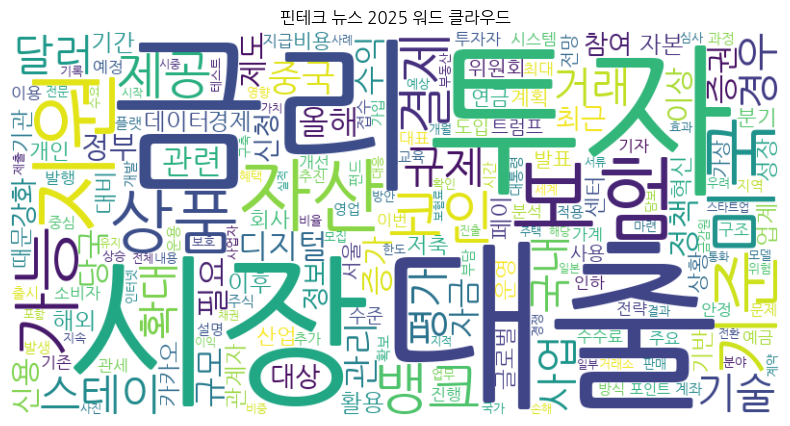

In [17]:
wc=WordCloud(
    font_path='NanumGothic.ttf',
    background_color='white',
    width=800,
    height=400).generate_from_frequencies(word_freq)
plt.figure(figsize=(10,5))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.title('핀테크 뉴스 2025 워드 클라우드')
plt.show()

# word2vec,LDA 토픽 모델링, T-sne 시각화

In [37]:
def find_optimal_topics(tokenized_texts,start=2,end=8):

    # gensim으로 Bow(숫자로 인코딩 된 단어 모음)
    dictionary=corpora.Dictionary(tokenized_texts)
    vectorizer=CountVectorizer(tokenizer=lambda x:x,lowercase=False)
    
    try:
        doc_term_matrix = vectorizer.fit_transform(tokenized_texts)
    except: 
        print("벡터화중 오류발생, 기본 토픽 수 2개 반환")
        return start 
    best_score=-1
    best_n=start

    #lda 분석
    for n_topics in range(start, end+1):
        lda_model=LatentDirichletAllocation(n_components=n_topics, random_state=42)
        lda_model.fit(doc_term_matrix)

        feature_names = vectorizer.get_feature_names_out()
        # 상위 10개의 단어를 순서대로 추출
        topics=[[feature_names[i]for i in topic.argsort()[:-11:-1]]for topic in lda_model.components_]

        # 응집도 계산
        cm=CoherenceModel(topics=topics,texts=tokenized_texts,dictionary=dictionary,coherence="c_v")
        score=cm.get_coherence()
        print(f"토픽수: {n_topics},Coherence Score:{score:.4f}")

        if score > best_score:
            best_score=score
            best_n=n_topics
    print(f"최적 토픽수: {best_n} (Score:{best_score:.4f})")
    return best_n

In [35]:
w2v_model=Word2Vec(sentences=df['tokens'],vector_size=100,window=5,min_count=2,workers=8,sg=1)


In [38]:
def topic_modeling(tokenized_texts_df,w2v_model,month):
    
    print("--- 토픽 모델링 시작 ---")
#최적 토피구 수 탐색
    try:
        print(f"\n핀테크 뉴스 2025 {month} 월 최적 토픽 수 계산중")
        best_k=find_optimal_topics(tokenized_texts_df)
    except Exception as e:
        print(f"\n핀테크 뉴스 2025 {month} 월 최적 토픽 수 계산 오류 {a}")
        
    #Countvectorizer
    try:
        vectorizer=CountVectorizer(tokenizer=lambda x:x,token_pattern=None,lowercase=False,max_df=0.9,min_df=5)
        review_vec=vectorizer.fit_transform(tokenized_texts_df)

        if review_vec.shape[1]==0:
            print(f"\n핀테크 뉴스 2025 {month}월 mind_df 조건 만족 단어 없음 =스킵]")

        #LDA 학습
        lda_model=LatentDirichletAllocation(n_components=best_k,random_state=42)
        lda_model.fit(review_vec)

        words=vectorizer.get_feature_names_out()

        #토픽별 상위 단어 출력 + 전체 단어 set에 모으기
        all_topic_words=set()
        print(f"\n핀테크 뉴스 2025 {month}월토빅별 상어 단위(k={best_k})")
        print("="*60)
        for i, topic in enumerate(lda_model.components_):
            top=[words[idx] for idx in topic.argsort()[-10:]]
            print(f"Topic #{i}:{top}")
            all_topic_words.update(top)

        print(f"토픽 단어 총 {len(all_topic_words)}개")

        # 토픽 단어 중 word2vec에 있는 것만을 사용해서 시각화
        valid_words=[word for word in all_topic_words if word in w2v_model.wv]
        print(f"word2vec에 포함된 토픽 단어수: {len(valid_words)}개")

        vectors=np.array([w2v_model.wv[word]for word in valid_words])

        tsne_perplexity=min(10,len(valid_words)-1)
        if tsne_perplexity <2:
            tsne_perplexity=2
        tsne=TSNE(n_components=2,random_state=42,perplexity=tsne_perplexity)
        reduced_vecs=tsne.fit_transform(vectors)

        #tsne 시각화
        plt.figure(figsize=(10,6))
        for i, word in enumerate(valid_words):
            x,y=reduced_vecs[i]
            plt.scatter(x,y)
            plt.text(x+0.01,y+0.01,word,fontsize=12)
        plt.title(f"\n핀테크 뉴스 2025 {month}월 토픽 단어의 Word2Vec 유사도 기반 시각화(T-SNE)")
        plt.show()
    except Exception as e:
        print(e)

In [32]:
df['날짜']=pd.to_datetime(df['날짜'])
df

/tmp/ipykernel_1971/2284044484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['날짜']=pd.to_datetime(df['날짜'])


,날짜,제목,원문링크,뉴스본문,tokens
1,2025-11-19,한국핀테크지원센터 2025 핀테크 전문가 개발자 과정 FinBoost Academy...,https://fintech.or.kr/web/board/boardContentsV...,한국핀테크지원센터는 핀테크 산업 성장에 기여하고자 최신트렌드를 반영한 교육과정을 기...,"[한국, 핀테크, 지원, 센터, 핀테크, 산업, 성장, 기여, 최신, 트렌드, 반영..."
2,2025-11-19,한국핀테크산업협회 네트워킹 행사 핀테크 커넥팅 데이 2025 개최 11 26 신청 ...,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요 핀테크산업협회 사무국입니다 협회는 핀테크 기업과 금융기관 AFA 등 해외...,"[안녕, 핀테크, 산업, 협회, 사무국, 협회, 핀테크, 기업, 금융, 기관, 해외..."
3,2025-11-19,한국핀테크지원센터 온라인 핀테크를 통한 금융 AI 트렌드와 혁신 사례 교육생 모집 상시,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요 한국핀테크지원센터입니다 2025년 금융특화 계층별 AI역량강화 과정 핀테...,"[안녕, 한국, 핀테크, 지원, 센터, 금융, 특화, 계층, 역량, 강화, 과정, ..."
4,2025-11-19,한국핀테크지원센터 2025년 핀테크기업 온라인 채용관 사람인 saramin 참여기업...,https://fintech.or.kr/web/board/boardContentsV...,2025년 핀테크기업 온라인 채용관 사람인 saramin 참여 기업 모집 한국핀테크...,"[핀테크, 기업, 온라인, 용관, 사람, 참여, 기업, 모집, 한국, 핀테크, 지원..."
5,2025-11-19,금융위 5대 금융지주 불러모아 포용금융 적극 역할 당부,https://n.news.naver.com/mnews/article/016/000...,포용금융 소통 점검회의 개최기관별 지원현황 준비상황 점검 금융위원회 제공 헤럴드경...,"[포용, 금융, 소통, 점검, 회의, 개최, 기관, 지원, 현황, 준비, 상황, 점..."
...,...,...,...,...,...
11746,2024-12-16,수렁에 빠진 중국 경제 몰락 중산층 2000만명 우버 택시로 몰렸다,https://n.news.naver.com/mnews/article/023/000...,온차이나 중국 민간 경제 전문가들 통계보다 훨씬 더 나쁘고 성장시대 저문다 경고 연...,"[온차, 중국, 민간, 경제, 전문가, 통계, 성장, 시대, 경고, 연간, 장률, ..."
11747,2024-12-16,관세 폭탄 때문에 내년엔 더 비싸 생필품 가전 등 사재기 열풍 부는,https://n.news.naver.com/mnews/article/277/000...,WSJ 사재기가 인플레이션 부추길 수도 지적미국의 일부 소비자들이 도널드 트럼프 미...,"[사재기, 인플레이션, 지적, 미국, 일부, 소비자, 도널드, 트럼프, 미국, 대통..."
11748,2024-12-16,구글 메타 등과 AI칩 합작 브로드컴 엔비디아 대항마로,https://n.news.naver.com/mnews/article/023/000...,시총도 1조달러 돌파 미국 반도체 기업 브로드컴이 13일 처음으로 시가총액 이...,"[달러, 돌파, 미국, 반도체, 기업, 브로드컴, 처음, 시가총액, 달러, 돌파, ..."
11749,2024-12-16,중국의 중동 동남아 통한 AI 반도체 우회 조달도 막는다,https://n.news.naver.com/mnews/article/023/000...,수출 물량 상한제 추진 미국 정부가 국가 안보를 이유로 특정 국가들에 인공지능 A...,"[수출, 물량, 상한, 추진, 미국, 정부, 국가, 안보, 이유, 특정, 국가, 인..."


--- 토픽 모델링 시작 ---

핀테크 뉴스 2025 1 월 최적 토픽 수 계산중


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2,Coherence Score:0.4228
토픽수: 3,Coherence Score:0.4463
토픽수: 4,Coherence Score:0.5006
토픽수: 5,Coherence Score:0.4957
토픽수: 6,Coherence Score:0.5495
토픽수: 7,Coherence Score:0.5484
토픽수: 8,Coherence Score:0.5887
최적 토픽수: 8 (Score:0.5887)

핀테크 뉴스 2025 1월토빅별 상어 단위(k=8)
Topic #0:['세계', '관세', '대통령', '시장', '기술', '달러', '기업', '중국', '트럼프', '미국']
Topic #1:['관리', '디지털', '시장', '투자', '혁신', '증권', '정보', '업무', '서비스', '금융']
Topic #2:['보장', '급여', '부담', '세대', '금융', '손해', '보험료', '수수료', '카드', '보험']
Topic #3:['기업', '거래소', '상장', '투자', '투자자', '금융', '거래', '시장', '가상', '자산']
Topic #4:['사회', '수익', '증권', '경제', '시장', '주식', '자산', '퇴직', '연금', '투자']
Topic #5:['분기', '올해', '가계', '인하', '기준', '지난해', '금융', '대출', '금리', '은행']
Topic #6:['과정', '한국', '인턴', '제공', '교육', '센터', '모집', '기업', '지원', '핀테크']
Topic #7:['인터넷', '결제', '토스', '금융', '고객', '카카오', '페이', '은행', '서비스', '뱅크']
토픽 단어 총 65개
word2vec에 포함된 토픽 단어수: 65개


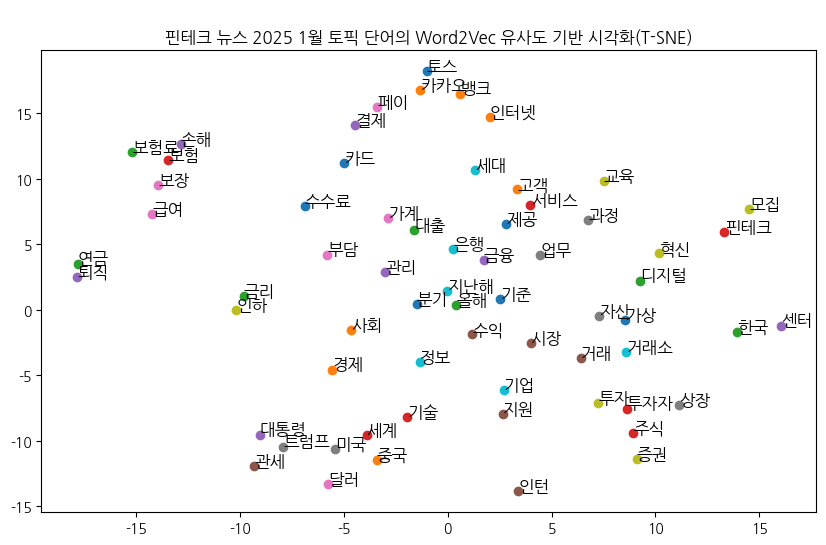

--- 토픽 모델링 시작 ---

핀테크 뉴스 2025 2 월 최적 토픽 수 계산중


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2,Coherence Score:0.3947
토픽수: 3,Coherence Score:0.4800
토픽수: 4,Coherence Score:0.5018
토픽수: 5,Coherence Score:0.5588
토픽수: 6,Coherence Score:0.5779
토픽수: 7,Coherence Score:0.6027
토픽수: 8,Coherence Score:0.6164
최적 토픽수: 8 (Score:0.6164)

핀테크 뉴스 2025 2월토빅별 상어 단위(k=8)
Topic #0:['거래', '거래소', '대출', '금융', '시장', '예금', '기준', '인하', '은행', '금리']
Topic #1:['자본', '강화', '시장', '계획', '당국', '회사', '관련', '검사', '금감원', '금융']
Topic #2:['시장', '투자', '경제', '대통령', '정책', '관세', '달러', '트럼프', '중국', '미국']
Topic #3:['저축', '신용', '카드', '가계', '증가', '뱅크', '지난해', '금융', '대출', '은행']
Topic #4:['가입', '판매', '수익', '지난해', '금융', '증권', '연금', '투자', '상품', '보험']
Topic #5:['서비스', '데이터', '투자', '금융', '지원', '사업', '가상', '핀테크', '자산', '기업']
Topic #6:['서비스', '비용', '기업', '핀테크', '지원', '수수료', '금융', '결제', '페이', '카드']
Topic #7:['업계', '유통', '손해', '자동차', '기업', '조각', '증권', '보험', '발행', '투자']
토픽 단어 총 59개
word2vec에 포함된 토픽 단어수: 59개


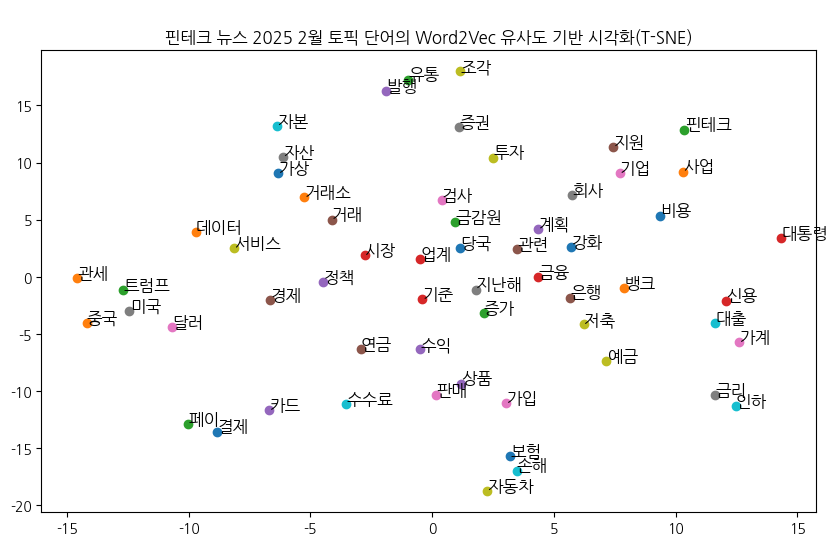

--- 토픽 모델링 시작 ---

핀테크 뉴스 2025 3 월 최적 토픽 수 계산중


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2,Coherence Score:0.3643
토픽수: 3,Coherence Score:0.3885
토픽수: 4,Coherence Score:0.4354
토픽수: 5,Coherence Score:0.5076
토픽수: 6,Coherence Score:0.5152
토픽수: 7,Coherence Score:0.5094
토픽수: 8,Coherence Score:0.5582
최적 토픽수: 8 (Score:0.5582)

핀테크 뉴스 2025 3월토빅별 상어 단위(k=8)
Topic #0:['퇴직', '수익', '상품', '계좌', '가입', '투자', '발행', '금융', '증권', '연금']
Topic #1:['접수', '비용', '심사', '테스트', '모집', '사업', '핀테크', '금융', '기업', '지원']
Topic #2:['정부', '투자', '대통령', '정책', '경제', '기업', '트럼프', '관세', '중국', '미국']
Topic #3:['기관', '회사', '관리', '기업', '관련', '정보', '데이터', '강화', '금감원', '금융']
Topic #4:['소비자', '보험료', '금융', '상품', '수수료', '결제', '서비스', '페이', '카드', '보험']
Topic #5:['증가', '가계', '지난해', '기준', '공매도', '저축', '금융', '대출', '금리', '은행']
Topic #6:['지난해', '인터넷', '토스', '서비스', '고객', '신용', '대출', '뱅크', '금융', '은행']
Topic #7:['디지털', '코인', '투자자', '거래소', '달러', '투자', '가상', '거래', '시장', '자산']
토픽 단어 총 66개
word2vec에 포함된 토픽 단어수: 66개


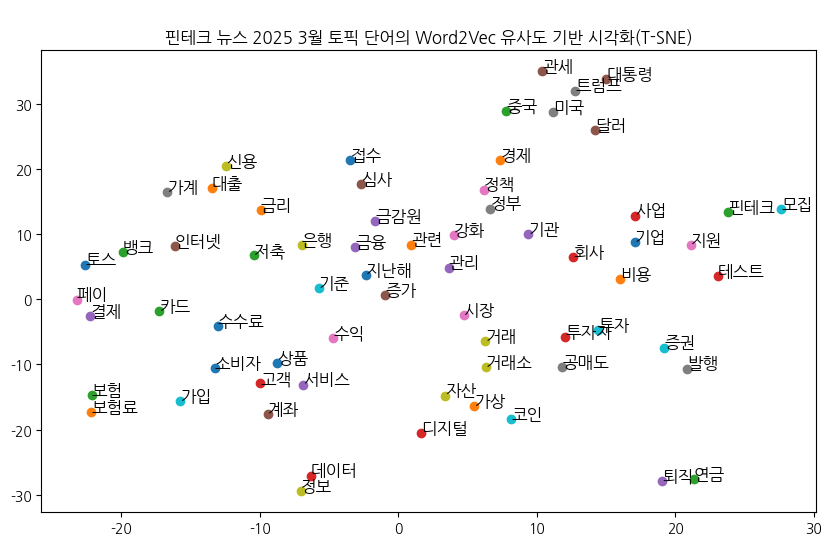

--- 토픽 모델링 시작 ---

핀테크 뉴스 2025 4 월 최적 토픽 수 계산중


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2,Coherence Score:0.4287
토픽수: 3,Coherence Score:0.5058
토픽수: 4,Coherence Score:0.5420
토픽수: 5,Coherence Score:0.5663
토픽수: 6,Coherence Score:0.5782
토픽수: 7,Coherence Score:0.5712
토픽수: 8,Coherence Score:0.5495
최적 토픽수: 6 (Score:0.5782)

핀테크 뉴스 2025 4월토빅별 상어 단위(k=6)
Topic #0:['평가', '기준', '테스트', '비용', '기업', '금융', '지원', '금리', '은행', '대출']
Topic #1:['무역', '경제', '시장', '기업', '대통령', '달러', '트럼프', '중국', '관세', '미국']
Topic #2:['참여', '스타트업', '모집', '한국', '센터', '핀테크', '기술', '기업', '지원', '금융']
Topic #3:['달러', '금융', '시장', '은행', '가상', '디지털', '스테이', '결제', '자산', '코인']
Topic #4:['제공', '토스', '뱅크', '은행', '상품', '고객', '카드', '보험', '금융', '서비스']
Topic #5:['연금', '자본', '보험', '수익', '자산', '증권', '시장', '은행', '투자', '금융']
토픽 단어 총 45개
word2vec에 포함된 토픽 단어수: 45개


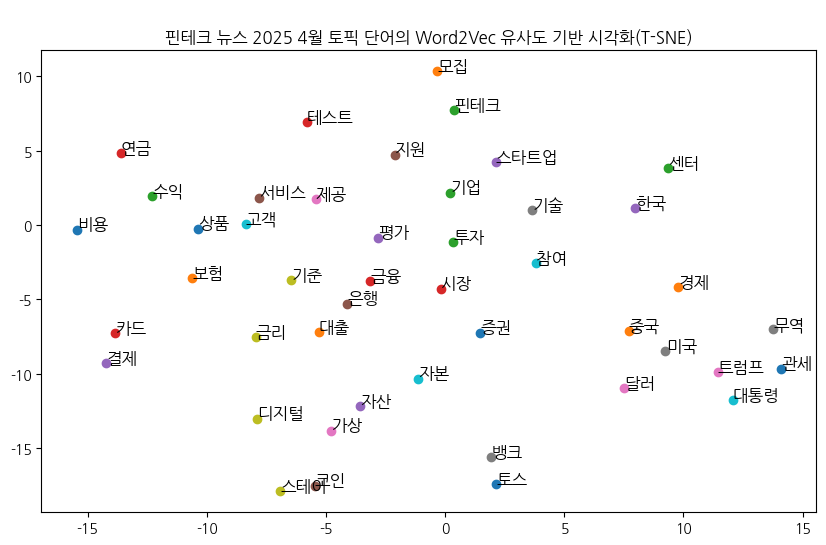

--- 토픽 모델링 시작 ---

핀테크 뉴스 2025 5 월 최적 토픽 수 계산중


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2,Coherence Score:0.4339
토픽수: 3,Coherence Score:0.4105
토픽수: 4,Coherence Score:0.4638
토픽수: 5,Coherence Score:0.5304
토픽수: 6,Coherence Score:0.5341
토픽수: 7,Coherence Score:0.5481
토픽수: 8,Coherence Score:0.5476
최적 토픽수: 7 (Score:0.5481)

핀테크 뉴스 2025 5월토빅별 상어 단위(k=7)
Topic #0:['혜택', '심사', '핀테크', '접수', '지원', '지역', '모집', '금융', '외국인', '카드']
Topic #1:['금융', '거래', '시장', '디지털', '가상', '달러', '결제', '자산', '스테이', '코인']
Topic #2:['정보', '제공', '토스', '상품', '연금', '은행', '뱅크', '고객', '서비스', '금융']
Topic #3:['센터', '평가', '비용', '금융', '접수', '신청', '테스트', '핀테크', '기업', '지원']
Topic #4:['달러', '대통령', '무역', '경제', '시장', '트럼프', '관세', '중국', '미국', '보험']
Topic #5:['증가', '예금', '신용', '기준', '저축', '분기', '금융', '금리', '대출', '은행']
Topic #6:['투자자', '규제', '상장', '펀드', '증권', '기업', '자본', '시장', '투자', '금융']
토픽 단어 총 57개
word2vec에 포함된 토픽 단어수: 57개


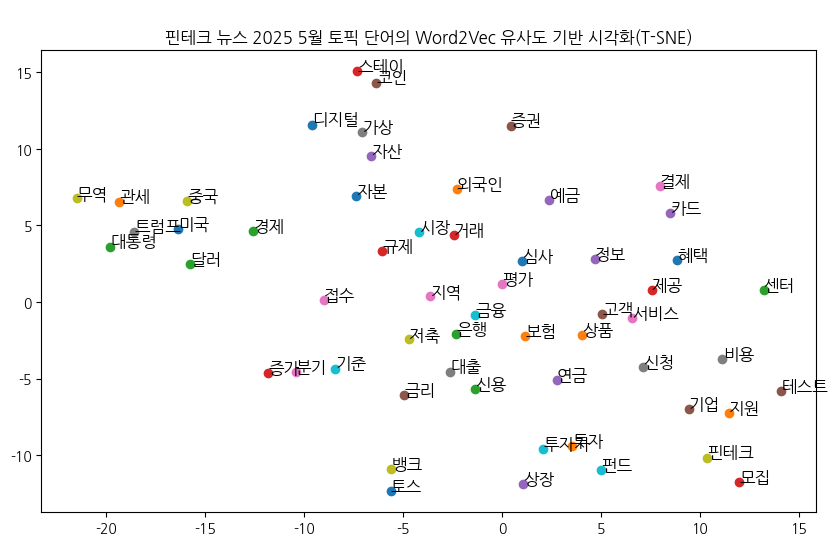

--- 토픽 모델링 시작 ---

핀테크 뉴스 2025 6 월 최적 토픽 수 계산중


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2,Coherence Score:0.4731
토픽수: 3,Coherence Score:0.4533
토픽수: 4,Coherence Score:0.5525
토픽수: 5,Coherence Score:0.5471
토픽수: 6,Coherence Score:0.5863
토픽수: 7,Coherence Score:0.6085
토픽수: 8,Coherence Score:0.5817
최적 토픽수: 7 (Score:0.6085)

핀테크 뉴스 2025 6월토빅별 상어 단위(k=7)
Topic #0:['기업', '증권', '상품', '자산', '연금', '서비스', '금융', '시장', '데이터', '투자']
Topic #1:['제출', '평가', '테스트', '접수', '신청', '투자', '금융', '핀테크', '기업', '지원']
Topic #2:['인하', '예금', '주택', '증가', '기준', '가계', '금융', '은행', '금리', '대출']
Topic #3:['트럼프', '경제', '일본', '자본', '투자', '정책', '기업', '달러', '시장', '미국']
Topic #4:['통제', '보험료', '상품', '판매', '계약', '보장', '손해', '미국', '중국', '보험']
Topic #5:['확대', '제공', '신용', '대출', '토스', '고객', '서비스', '뱅크', '은행', '금융']
Topic #6:['시장', '발행', '디지털', '금융', '페이', '자산', '카드', '결제', '스테이', '코인']
토픽 단어 총 54개
word2vec에 포함된 토픽 단어수: 54개


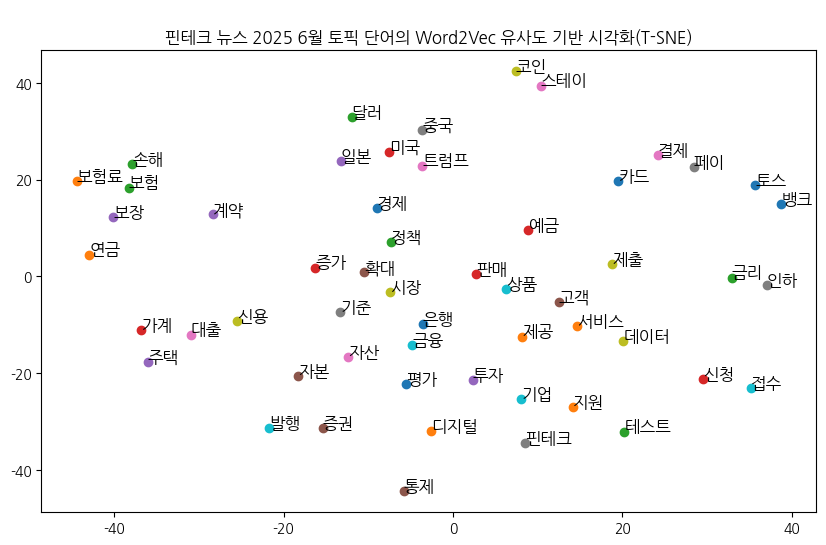

--- 토픽 모델링 시작 ---

핀테크 뉴스 2025 7 월 최적 토픽 수 계산중


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2,Coherence Score:0.5187
토픽수: 3,Coherence Score:0.4681
토픽수: 4,Coherence Score:0.5682
토픽수: 5,Coherence Score:0.5684
토픽수: 6,Coherence Score:0.5364
토픽수: 7,Coherence Score:0.5086
토픽수: 8,Coherence Score:0.5749
최적 토픽수: 8 (Score:0.5749)

핀테크 뉴스 2025 7월토빅별 상어 단위(k=8)
Topic #0:['제공', '수수료', '토스', '고객', '금융', '카드', '서비스', '카카오', '은행', '뱅크']
Topic #1:['국가', '합의', '무역', '협상', '달러', '대통령', '트럼프', '관세', '중국', '미국']
Topic #2:['거래소', '자산', '거래', '페이', '서비스', '금융', '결제', '시장', '투자', '보험']
Topic #3:['자산', '투자', '기준', '수익', '예금', '상품', '저축', '금리', '은행', '금융']
Topic #4:['신용', '카드', '주택', '보험', '규제', '금리', '가계', '금융', '은행', '대출']
Topic #5:['은행', '결제', '발행', '달러', '디지털', '시장', '금융', '자산', '스테이', '코인']
Topic #6:['교육', '기술', '보이스', '피싱', '활용', '과정', '평가', '정보', '데이터', '금융']
Topic #7:['제공', '서류', '한국', '센터', '교육', '신청', '참여', '지원', '핀테크', '기업']
토픽 단어 총 60개
word2vec에 포함된 토픽 단어수: 60개


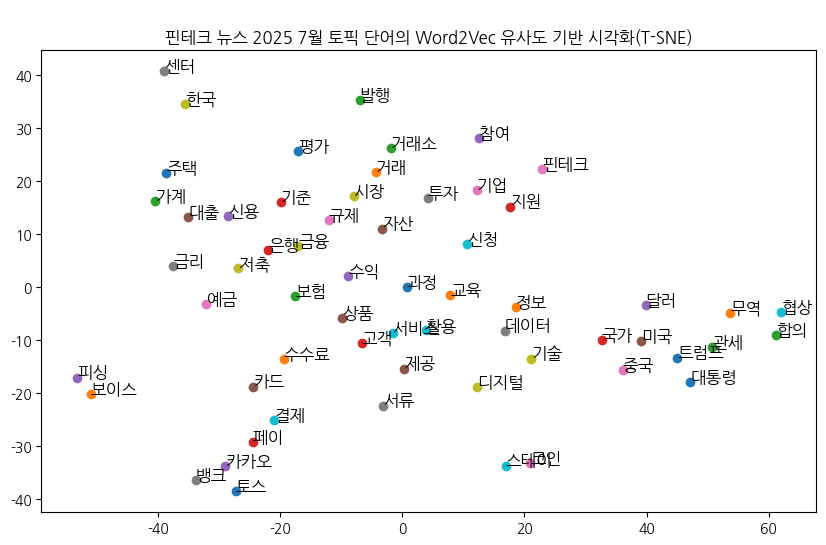

--- 토픽 모델링 시작 ---

핀테크 뉴스 2025 8 월 최적 토픽 수 계산중


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2,Coherence Score:0.4821
토픽수: 3,Coherence Score:0.4789
토픽수: 4,Coherence Score:0.5652
토픽수: 5,Coherence Score:0.5788
토픽수: 6,Coherence Score:0.5801
토픽수: 7,Coherence Score:0.5876
토픽수: 8,Coherence Score:0.5940
최적 토픽수: 8 (Score:0.5940)

핀테크 뉴스 2025 8월토빅별 상어 단위(k=8)
Topic #0:['인하', '규제', '시장', '가계', '기준', '신용', '금리', '은행', '금융', '대출']
Topic #1:['금융', '참여', '진출', '발표', '서류', '신청', '해외', '지원', '기업', '핀테크']
Topic #2:['고객', '분석', '기반', '참여', '활용', '정보', '서비스', '지원', '데이터', '금융']
Topic #3:['사례', '경제', '정부', '기업', '대통령', '트럼프', '관세', '금융', '중국', '미국']
Topic #4:['토스', '고객', '금융', '카카오', '페이', '은행', '뱅크', '서비스', '결제', '카드']
Topic #5:['참여', '대상', '기업', '센터', '한국', '지원', '금융', '과정', '핀테크', '교육']
Topic #6:['예금', '보험료', '손해', '가입', '상품', '금융', '연금', '저축', '은행', '보험']
Topic #7:['디지털', '달러', '가상', '기업', '금융', '투자', '시장', '자산', '스테이', '코인']
토픽 단어 총 60개
word2vec에 포함된 토픽 단어수: 60개


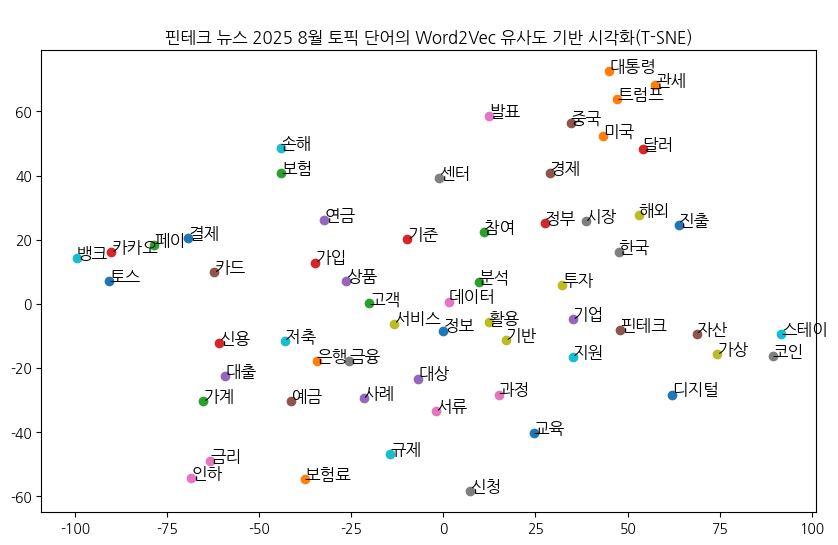

--- 토픽 모델링 시작 ---

핀테크 뉴스 2025 9 월 최적 토픽 수 계산중


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2,Coherence Score:0.3573
토픽수: 3,Coherence Score:0.4174
토픽수: 4,Coherence Score:0.4604
토픽수: 5,Coherence Score:0.4740
토픽수: 6,Coherence Score:0.4688
토픽수: 7,Coherence Score:0.5252
토픽수: 8,Coherence Score:0.5209
최적 토픽수: 7 (Score:0.5252)

핀테크 뉴스 2025 9월토빅별 상어 단위(k=7)
Topic #0:['주식', '투자자', '중국', '성장', '거래', '글로벌', '기업', '미국', '투자', '시장']
Topic #1:['신용', '정부', '뱅크', '소비자', '기업', '금리', '규제', '대출', '은행', '금융']
Topic #2:['자산', '고객', '투자', '서비스', '연금', '은행', '상품', '금융', '카드', '금리']
Topic #3:['개발', '고객', '보안', '활용', '중국', '금융', '기술', '기업', '데이터', '서비스']
Topic #4:['미국', '가상', '결제', '디지털', '달러', '발행', '금융', '자산', '스테이', '코인']
Topic #5:['증가', '생명', '상품', '보험금', '손해', '참여', '지원', '핀테크', '기업', '보험']
Topic #6:['심사', '대상', '한국', '아이디어', '신청', '센터', '교육', '금융', '지원', '핀테크']
토픽 단어 총 52개
word2vec에 포함된 토픽 단어수: 52개


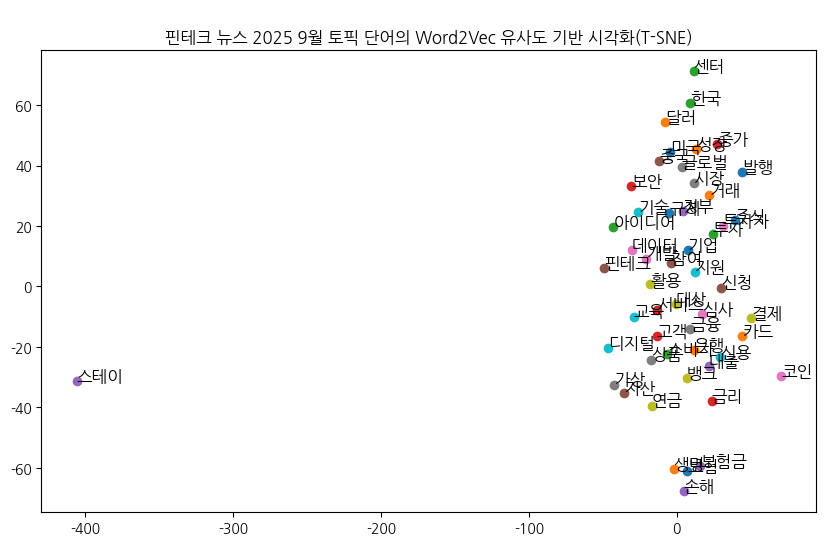

--- 토픽 모델링 시작 ---

핀테크 뉴스 2025 10 월 최적 토픽 수 계산중


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2,Coherence Score:0.4133
토픽수: 3,Coherence Score:0.4245
토픽수: 4,Coherence Score:0.4338
토픽수: 5,Coherence Score:0.4325
토픽수: 6,Coherence Score:0.4681
토픽수: 7,Coherence Score:0.4749
토픽수: 8,Coherence Score:0.5270
최적 토픽수: 8 (Score:0.5270)

핀테크 뉴스 2025 10월토빅별 상어 단위(k=8)
Topic #0:['가계', '규제', '저축', '데이터', '신용', '뱅크', '금리', '금융', '은행', '대출']
Topic #1:['전망', '은행', '인하', '기준', '투자', '시장', '분기', '금융', '수익', '금리']
Topic #2:['투자', '소비자', '위원회', '거래', '보호', '보안', '서비스', '은행', '정보', '금융']
Topic #3:['미국', '시장', '중국', '기술', '자산', '산업', '기업', '스테이', '코인', '금융']
Topic #4:['생명', '손해', '제도', '보험금', '보험료', '금융', '연금', '상품', '카드', '보험']
Topic #5:['과정', '한국', '참여', '금융', '신청', '센터', '교육', '기업', '지원', '핀테크']
Topic #6:['주식', '투자자', '가상', '거래소', '거래', '투자', '시장', '미국', '자산', '달러']
Topic #7:['협력', '제공', '기술', '투자', '네이버', '스타트업', '페이', '서비스', '기업', '결제']
토픽 단어 총 60개
word2vec에 포함된 토픽 단어수: 60개


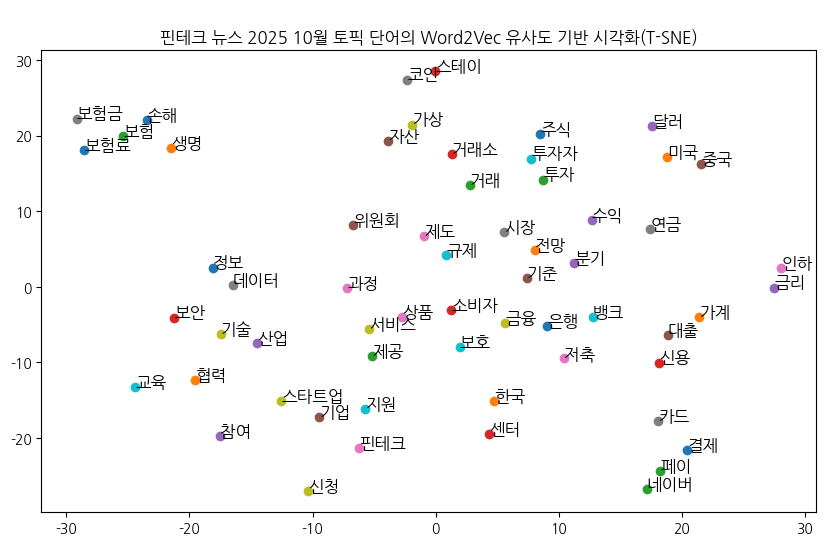

--- 토픽 모델링 시작 ---

핀테크 뉴스 2025 11 월 최적 토픽 수 계산중


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2,Coherence Score:0.4255
토픽수: 3,Coherence Score:0.4205
토픽수: 4,Coherence Score:0.4578
토픽수: 5,Coherence Score:0.4864
토픽수: 6,Coherence Score:0.5245
토픽수: 7,Coherence Score:0.4845
토픽수: 8,Coherence Score:0.4682
최적 토픽수: 6 (Score:0.5245)

핀테크 뉴스 2025 11월토빅별 상어 단위(k=6)
Topic #0:['주식', '자본', '투자자', '발행', '거래', '증권', '자산', '시장', '금융', '투자']
Topic #1:['금융', '산업', '투자', '경제', '정부', '기업', '달러', '중국', '데이터', '미국']
Topic #2:['카카오', '증가', '신용', '뱅크', '분기', '금융', '카드', '금리', '대출', '은행']
Topic #3:['데이터', '활용', '시장', '기반', '기술', '디지털', '기업', '서비스', '결제', '금융']
Topic #4:['보험료', '지주', '대출', '개선', '소비자', '관리', '당국', '자본', '보험', '금융']
Topic #5:['한국', '센터', '참여', '교육', '신청', '스테이', '코인', '기업', '지원', '핀테크']
토픽 단어 총 49개
word2vec에 포함된 토픽 단어수: 49개


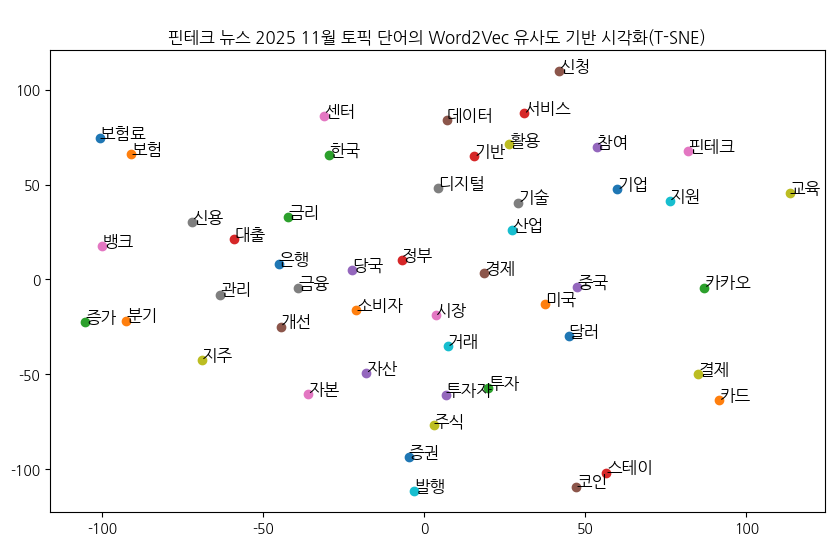

In [39]:
for month in range(1,12):
    topic_modeling(df.loc[(df['날짜'].dt.month==month),'tokens'],w2v_model,month)

In [40]:
# !pip install python-dotenv

In [41]:
# !pip install google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14/14 [google-genai] [google-genai]s]]


In [44]:
import os
from dotenv import load_dotenv
load_dotenv("./.env_gemini")
GEMINI_API_KEY=os.getenv('GEMINI_API_KEY')
from google import genai

In [46]:
# The client gets the API key from the environment variable `GEMINI_API_KEY`.
client = genai.Client(api_key=GEMINI_API_KEY)

response = client.models.generate_content(
    model="gemini-2.5-flash", contents="핀테크에 대해서 알려줘"
)
print(response.text)

'핀테크(FinTech)'는 **금융(Finance)과 기술(Technology)의 합성어**로, 정보통신기술(ICT)을 활용하여 기존 금융 서비스의 효율성을 높이고, 새로운 형태의 금융 서비스를 제공하는 산업 및 기술 분야를 총칭합니다.

쉽게 말해, **기술을 통해 돈과 관련된 모든 것을 더 편리하고, 빠르고, 저렴하며, 혁신적으로 만드는 것**이라고 이해할 수 있습니다.

---

### 핀테크의 주요 특징

1.  **혁신성:** 전통적인 금융 방식에서 벗어나 새로운 기술과 아이디어를 접목하여 전에 없던 서비스를 만듭니다.
2.  **효율성:** 복잡하고 시간이 오래 걸리던 금융 과정을 간소화하고 자동화하여 비용을 절감하고 시간을 단축합니다.
3.  **접근성 향상:** 스마트폰 앱 등을 통해 언제 어디서나 금융 서비스에 접근할 수 있게 하여, 금융 소외 계층에게도 기회를 제공합니다.
4.  **개인화:** 빅데이터와 AI를 활용하여 개인의 금융 패턴에 맞는 맞춤형 서비스를 제공합니다.
5.  **사용자 중심:** 복잡했던 금융 인터페이스를 쉽고 직관적으로 개선하여 사용자 경험(UX)을 극대화합니다.

---

### 핀테크를 지탱하는 핵심 기술

*   **인공지능(AI) 및 머신러닝(ML):** 신용 평가, 자산 관리(로보 어드바이저), 사기 탐지, 맞춤형 금융 상품 추천 등에 활용됩니다.
*   **빅데이터:** 방대한 금융 데이터를 분석하여 시장 예측, 위험 관리, 고객 행동 분석 등에 활용됩니다.
*   **블록체인(Blockchain):** 암호화폐, 분산원장기술(DLT)을 통해 거래의 투명성과 보안성을 높이고 중개인 없이 직접 거래를 가능하게 합니다.
*   **클라우드 컴퓨팅:** 금융 서비스 인프라를 유연하고 효율적으로 운영하며, 대규모 데이터 처리 및 저장에 활용됩니다.
*   **모바일 기술:** 스마트폰 앱을 통한 간편 결제, 계좌 관리, 송금 등 대부분의 핀테크 서비스의 기반이 됩니다.
*   **API(Application Pr

# 핀테크 뉴스 제목을 분기별로 gemini에게 요약시키고 아이디어 물어보기

In [54]:
titles="".join(df.loc[(df['날짜'].dt.month >=1)&(df['날짜'].dt.month<=3),'제목'].tolist())
len(titles)

91663

In [55]:
response = client.models.generate_content(
    model="gemini-2.5-flash", contents=f"""{titles}\n위의 글은 핀테크 관련 뉴스 제목들이야 
    이 제목을 분석해서 어떤 이슈들이 중요한 사건이었는지 분석하고, 그 내용을 토대로 
    새로운 핀테크 서비스를 기획할 때 사용할 수 있을 만한 아이디어 5개 제시해줘"""
)
print(response.text)

제시된 핀테크 뉴스 제목들을 분석하여 중요한 이슈들을 파악하고, 이를 바탕으로 새로운 핀테크 서비스 아이디어를 제시합니다.

---

### **핀테크 뉴스 제목 분석 및 주요 이슈 도출**

제공된 뉴스 제목들을 종합적으로 분석했을 때, 핀테크 산업을 관통하는 몇 가지 핵심적인 이슈와 트렌드를 파악할 수 있습니다.

**1. 인터넷 전문은행(이하 인뱅)의 성장과 역할 재정립:**
*   **성장세와 과제:** 카카오뱅크, 케이뱅크, 토스뱅크 등 인뱅 3사의 순이익 급증과 IPO 재추진(케이뱅크), 비대면 대출 확대 등의 긍정적인 소식이 많습니다. 하지만 동시에 '이자 장사' 비판, '포용 금융' 소홀 논란, 중·저신용자 대출 목표 미달, 대출 규제 압박(주담대) 등의 지적도 꾸준히 제기됩니다.
*   **해외 진출 및 신사업:** 태국 등 해외 시장 진출, 기업금융(케이뱅크), 개인사업자 대출 확대, 모임통장 등 신규 서비스 경쟁이 활발합니다.
*   **제4인뱅 논의:** 제4인터넷은행 출범에 대한 기대와 우려가 공존하며, 컨소시엄 경쟁(한국소호은행, 유뱅크, 더존비즈온 등)이 뜨겁습니다. 기존 인뱅의 역할론에 따라 제4인뱅의 필요성도 재조명받고 있습니다.

**2. AI 및 디지털 기술의 금융 서비스 전면 적용:**
*   **적용 확대:** 생성형 AI, LLM(대규모 언어 모델)을 활용한 금융 특화 서비스(금융 특화 한글 말뭉치 제공, AI 기반 세무/법률/노무 서비스 등), 로보어드바이저(퇴직연금 자동운용) 등이 활발하게 도입되고 있습니다.
*   **생산성 및 효율성 증대:** 금융사들의 디지털 전환 가속화, AI 전문인력 양성, 사이버 보안 강화 등 내부 역량 강화에도 집중하고 있습니다.
*   **AI 리스크 및 규제:** '딥시크(Deepseek)'와 같은 AI 보안 우려 및 규제 논의(AI 기본법)도 함께 진행됩니다.

**3. 가상자산(암호화폐) 시장의 제도화 및 확장:**
*   **법인 투자 허용 논의:** 금융당국이 가상자산 2단계 

# 분기별로 분석

In [57]:
results=""
for mon in range(1,13,3):
    titles="".join(df.loc[(df['날짜'].dt.month >=mon)&(df['날짜'].dt.month<=mon+2),'제목'].tolist())
    response = client.models.generate_content(
    model="gemini-2.5-flash", contents=f"""{titles}\n위의 글은 핀테크 관련 뉴스 제목들이야 
    이 제목을 분석해서 어떤 이슈들이 중요한 사건이었는지 분석하고, 그 내용을 토대로 
    새로운 핀테크 서비스를 기획할 때 사용할 수 있을 만한 아이디어 5개 제시해줘"""
)
    results+='\n' + response.text
print(results)


제시된 핀테크 관련 뉴스 제목들을 분석하여 주요 이슈를 파악하고, 이를 바탕으로 새로운 핀테크 서비스 아이디어를 제안합니다.

---

### **핀테크 관련 뉴스 제목 분석 및 주요 이슈**

제공된 뉴스 제목들을 종합적으로 분석했을 때, 다음과 같은 주요 핀테크 및 금융 산업 이슈들이 부각됩니다.

1.  **인터넷전문은행의 성장과 규제:**
    *   **성장세 지속 및 포용금융 논란:** 카카오뱅크, 케이뱅크, 토스뱅크 등 인터넷전문은행(인뱅)이 높은 순익을 기록하며 빠르게 성장하고 있으나, 동시에 '이자장사' 비판과 중저신용자 대출 공급 목표 미달(또는 중단) 등으로 '포용금융'이라는 설립 취지를 훼손한다는 지적이 꾸준히 제기되고 있습니다. 특히, 제4인뱅 인가 추진 과정에서 기존 인뱅들의 역할이 심사 기준이 될 것으로 보입니다.
    *   **서비스 확장 및 차별화 노력:** 전월세보증금대출(토스뱅크), 기업금융(케이뱅크), 소상공인 대출(카카오뱅크, 토스뱅크), 비대면 주담대 등 다양한 대출 상품을 확대하고 있으며, ATM 확대 등 비대면의 한계를 극복하려는 노력도 보입니다.
    *   **경쟁 심화 및 신규 진입:** 제4인터넷은행 예비인가 심사가 진행 중이며, 시중은행들도 인뱅에 관심을 보이거나 (농협, 신한 등), 자체적으로 디지털 전환을 가속화하며 경쟁에 참여하고 있습니다.

2.  **가상자산(디지털자산) 시장의 제도화 및 확장:**
    *   **규제 정비 및 시장 개방 기대:** '가상자산 2단계 입법', '법인 가상자산 투자 가이드라인' 마련 논의가 활발하며, 이는 기관 투자 및 법인의 가상자산 시장 참여를 위한 제도적 기반이 될 것으로 보입니다.
    *   **CBDC(중앙은행 디지털화폐) 및 스테이블코인:** 한국은행의 디지털화폐 실거래 실험 및 스테이블코인 활용 방안 논의 등 디지털 통화 인프라 구축에 대한 관심이 높습니다.
    *   **글로벌 동향 및 패권 경쟁:** 트럼프 전 대통령의 가상자산 친화적

# 분기별 분석결과를 모아서 다시 분석하고 서비스 아이디어를 도출하기, 마크다운 코드로 정리해서 받기

In [59]:
response = client.models.generate_content(
    model="gemini-2.5-flash", contents=f"""{results}\n위의 글은 핀테크 관련 뉴스 제목을 분기별로 모아서 분석했던 결과야. 이 모든
    내용을 다시 종합해서 주요 이슈를 분석하고 그 내용을 토대로 새로운 핀테크 서비스를 기획할 때 사용할 수 있을만한 아이디어 10개 제시해줘.
    그리고 웹을 검색해서 새로운 아이디어를 이미 서비스로 개발해서 출시한 앱이나 사이트가 있으면 그곳의 링크 제시해줘.
    이 모든 내용을 마크다운 표 코드로 정리되도록 해줘"""
)
print(response.text)


sdk_http_response=HttpResponse(
  headers=<dict len=11>
) candidates=[Candidate(
  content=Content(
    parts=[
      Part(
        text="""제공해주신 핀테크 관련 뉴스 제목들을 종합적으로 분석하여, 현재 핀테크 시장의 주요 이슈와 트렌드를 통합적으로 파악했습니다. 이를 바탕으로 새로운 핀테크 서비스 아이디어 10가지를 제안하며, 각 아이디어에 대한 기존 유사 서비스(앱/사이트) 검색 결과도 함께 제시합니다.

---

### **통합 핀테크 주요 이슈 및 트렌드 분석**

제시된 뉴스 제목들을 종합적으로 분석했을 때, 다음과 같은 핵심 핀테크 및 금융 산업 이슈와 트렌드가 두드러집니다.

1.  **AI(인공지능)의 압도적인 영향력 및 전방위적 확산:**
    *   **서비스 혁신:** 생성형 AI, 머신러닝 등을 활용한 금융상품 추천, 개인 맞춤형 자산 관리, 대안 신용평가, 고객 서비스(챗봇, AI 뱅커), 내부 업무 효율화 및 자동화(SI, QA)가 가속화됩니다.
    *   **리스크 관리 및 보안:** AI 기반의 금융사기(보이스피싱, 딥페이크) 탐지 및 예방, 이상 거래 감지 시스템(FDS) 고도화, 사이버 보안 강화에 AI가 필수적으로 활용됩니다.
    *   **인재 양성 및 규제:** 금융 AI 전문가 양성 교육이 활발하며, AI 기본법 제정 논의와 함께 AI의 윤리적 사용, 신뢰성, 개인정보 보호에 대한 규제 및 가이드라인 마련이 중요해지고 있습니다.

2.  **디지털 자산(가상자산, 스테이블코인, STO)의 제도권 편입 및 시장 확장:**
    *   **스테이블코인 급부상:** 원화 스테이블코인 발행 논의, 금융권(은행, 빅테크)의 참여 의지, 해외 송금 및 결제 수단으로서의 잠재력이 매우 높습니다.
    *   **STO(토큰증권) 및 조각투자:** 실물자산(부동산, 미술품, 음악 저작권)을 토큰화하여 소액 투자 기

In [60]:
print(response.text)

제공해주신 핀테크 관련 뉴스 제목들을 종합적으로 분석하여, 현재 핀테크 시장의 주요 이슈와 트렌드를 통합적으로 파악했습니다. 이를 바탕으로 새로운 핀테크 서비스 아이디어 10가지를 제안하며, 각 아이디어에 대한 기존 유사 서비스(앱/사이트) 검색 결과도 함께 제시합니다.

---

### **통합 핀테크 주요 이슈 및 트렌드 분석**

제시된 뉴스 제목들을 종합적으로 분석했을 때, 다음과 같은 핵심 핀테크 및 금융 산업 이슈와 트렌드가 두드러집니다.

1.  **AI(인공지능)의 압도적인 영향력 및 전방위적 확산:**
    *   **서비스 혁신:** 생성형 AI, 머신러닝 등을 활용한 금융상품 추천, 개인 맞춤형 자산 관리, 대안 신용평가, 고객 서비스(챗봇, AI 뱅커), 내부 업무 효율화 및 자동화(SI, QA)가 가속화됩니다.
    *   **리스크 관리 및 보안:** AI 기반의 금융사기(보이스피싱, 딥페이크) 탐지 및 예방, 이상 거래 감지 시스템(FDS) 고도화, 사이버 보안 강화에 AI가 필수적으로 활용됩니다.
    *   **인재 양성 및 규제:** 금융 AI 전문가 양성 교육이 활발하며, AI 기본법 제정 논의와 함께 AI의 윤리적 사용, 신뢰성, 개인정보 보호에 대한 규제 및 가이드라인 마련이 중요해지고 있습니다.

2.  **디지털 자산(가상자산, 스테이블코인, STO)의 제도권 편입 및 시장 확장:**
    *   **스테이블코인 급부상:** 원화 스테이블코인 발행 논의, 금융권(은행, 빅테크)의 참여 의지, 해외 송금 및 결제 수단으로서의 잠재력이 매우 높습니다.
    *   **STO(토큰증권) 및 조각투자:** 실물자산(부동산, 미술품, 음악 저작권)을 토큰화하여 소액 투자 기회를 제공하는 STO 시장의 법제화와 활성화가 기대됩니다.
    *   **가상자산 규제 강화:** 가상자산 관련 입법 지연 속에서도 불공정 거래 감시, 자금세탁방지(AML) 강화, 투자자 보호에 대한 금융당국의 엄격한 기조가 유지됩니다.

3.  

제공해주신 핀테크 관련 뉴스 제목들을 종합적으로 분석하여, 현재 핀테크 시장의 주요 이슈와 트렌드를 통합적으로 파악했습니다. 이를 바탕으로 새로운 핀테크 서비스 아이디어 10가지를 제안하며, 각 아이디어에 대한 기존 유사 서비스(앱/사이트) 검색 결과도 함께 제시합니다.

---

### **통합 핀테크 주요 이슈 및 트렌드 분석**

제시된 뉴스 제목들을 종합적으로 분석했을 때, 다음과 같은 핵심 핀테크 및 금융 산업 이슈와 트렌드가 두드러집니다.

1.  **AI(인공지능)의 압도적인 영향력 및 전방위적 확산:**
    *   **서비스 혁신:** 생성형 AI, 머신러닝 등을 활용한 금융상품 추천, 개인 맞춤형 자산 관리, 대안 신용평가, 고객 서비스(챗봇, AI 뱅커), 내부 업무 효율화 및 자동화(SI, QA)가 가속화됩니다.
    *   **리스크 관리 및 보안:** AI 기반의 금융사기(보이스피싱, 딥페이크) 탐지 및 예방, 이상 거래 감지 시스템(FDS) 고도화, 사이버 보안 강화에 AI가 필수적으로 활용됩니다.
    *   **인재 양성 및 규제:** 금융 AI 전문가 양성 교육이 활발하며, AI 기본법 제정 논의와 함께 AI의 윤리적 사용, 신뢰성, 개인정보 보호에 대한 규제 및 가이드라인 마련이 중요해지고 있습니다.

2.  **디지털 자산(가상자산, 스테이블코인, STO)의 제도권 편입 및 시장 확장:**
    *   **스테이블코인 급부상:** 원화 스테이블코인 발행 논의, 금융권(은행, 빅테크)의 참여 의지, 해외 송금 및 결제 수단으로서의 잠재력이 매우 높습니다.
    *   **STO(토큰증권) 및 조각투자:** 실물자산(부동산, 미술품, 음악 저작권)을 토큰화하여 소액 투자 기회를 제공하는 STO 시장의 법제화와 활성화가 기대됩니다.
    *   **가상자산 규제 강화:** 가상자산 관련 입법 지연 속에서도 불공정 거래 감시, 자금세탁방지(AML) 강화, 투자자 보호에 대한 금융당국의 엄격한 기조가 유지됩니다.

3.  **플랫폼 경쟁 심화 및 '슈퍼 앱' 전략 가속화:**
    *   **빅테크의 금융 영역 확장:** 카카오페이, 네이버페이, 토스 등 빅테크 기업들은 간편결제를 넘어 대출, 투자, 보험, 자산 관리 등 금융 전반으로 서비스를 확장하며 '슈퍼 앱'으로 진화하고 있습니다.
    *   **전통 금융권의 대응:** 시중은행들도 자체 슈퍼 앱 구축, 마이데이터 기반 서비스 강화, MZ세대 및 특정 고객층(시니어, 외국인) 맞춤형 서비스 개발로 경쟁에 참여하고 있습니다.
    *   **해외 시장 진출:** 국내 시장의 한계를 넘어 동남아 등 해외 시장으로 진출하여 새로운 성장 동력을 모색하는 움직임이 활발합니다.

4.  **금융 포용, 소비자 보호 및 생산적 금융 강조:**
    *   **취약계층 지원:** 중저신용자 대출 확대 요구, 소상공인 지원 대출, 서민금융 지원(신용 사면, 새출발기금), 고령층 및 외국인 등 금융 소외 계층을 위한 서비스 개선이 강조됩니다.
    *   **금융 소비자 보호:** 보이스피싱, 해킹 등 금융 사기 피해 예방 및 배상 책임 강화, 불공정 거래 근절, 내부통제 시스템 강화(책무구조도) 등 금융 안정성 확보와 소비자 권익 보호가 최우선 과제입니다.
    *   **생산적 금융:** 금융권의 자금이 단순히 대출 증가를 넘어 기술 혁신 기업, 스타트업, 사회적 기업 등 생산적인 분야로 흘러갈 수 있도록 유도하는 정책 방향이 중요합니다.

5.  **경제 불확실성 증대 및 건전성 관리 강화:**
    *   **가계부채 및 대출 리스크:** 고금리 기조 속 가계대출 증가, 부동산PF 부실, 연체율 상승 등으로 금융 시스템의 건전성 관리 부담이 커지고 있습니다.
    *   **금융기관 수익성 악화:** 경기 둔화와 규제 강화 속에서 은행, 보험, 증권, 저축은행 등 금융기관들의 수익성 방어와 리스크 관리가 더욱 중요해지고 있습니다.

---

### **새로운 핀테크 서비스 아이디어 10가지**

위에서 분석한 주요 이슈들을 바탕으로, 시장의 니즈와 기술 트렌드를 반영한 새로운 핀테크 서비스 아이디어 10가지를 제안합니다.

| 아이디어 번호 | 서비스 아이디어 | 주요 이슈 반영 | 기존 유사 서비스 (링크) |
|:--------------|:-------------------------------------------|:-----------------------------------------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------|
| **1**         | **AI 기반 '생애주기 금융 건강 지수' 및 맞춤형 자산 리모델링** | AI 혁신, 금융 포용, 경제 불확실성 (리스크 관리) | [Empower Personal Capital](https://www.empower.com/), [Mint](https://mint.intuit.com/) |
|               | **개념:** 사용자의 건강, 가족, 소득, 자산, 소비 패턴 등을 AI가 종합 분석하여 실시간 '금융 건강 지수'를 제공하고, 생애주기별 맞춤형 금융 상품(대출, 보험, 연금, 투자) 포트폴리오를 제안하며, 재정 위기 시뮬레이션 및 대비책을 자동으로 리모델링 해주는 서비스. 딥페이크 등 AI 사기 패턴 분석으로 금융 사기 위험도 사전 경고. |                                                      |                                                                                                                                                    |
| **2**         | **'K-스테이블코인' 기반 소상공인 글로벌 비즈니스 허브**     | 디지털 자산(스테이블코인), 플랫폼 경쟁(해외), 금융 포용 | [Circle (USDC)](https://www.circle.com/en/usdc), [Veem](https://www.veem.com/), [RippleNet](https://ripple.com/ripplenet/) |
|               | **개념:** 국내 소상공인이 원화 스테이블코인(K-스테이블코인)을 활용하여 해외 고객에게 직접 결제를 받거나, 해외 파트너에게 저렴하고 빠르게 송금할 수 있는 B2B2C 플랫폼. 환전 수수료 절감 및 정산 시간 단축. K-스테이블코인 거래 데이터를 활용한 신용평가로 저금리 정책 대출 연계. |                                                      |                                                                                                                                                    |
| **3**         | **AI 기반 '딥가드(DeepGuard)' 금융 사기 예측 및 실시간 차단 솔루션 (B2B/B2G)** | AI 혁신, 소비자 보호, 건전성 관리 | [Shift Technology](https://www.shift-technology.com/) (보험 사기), [Fraud.net](https://fraud.net/) |
|               | **개념:** 금융기관 및 금융당국을 위한 AI 기반 통합 솔루션으로, 딥페이크 음성/영상 분석, 보이스피싱 자금 흐름 예측, 이상 거래 패턴 실시간 감지 및 AI 챗봇을 통한 피해자 심리 분석까지 통합하여 금융 사기를 선제적으로 예측하고 차단하며, 피해 발생 시 신속한 구제 절차를 지원. |                                                      |                                                                                                                                                    |
| **4**         | **'커뮤니티 Impact STO' 플랫폼: 지역 발전 및 사회적 기업 투자** | 디지털 자산(STO), 생산적 금융, 금융 포용 | [Lofty.ai](https://www.lofty.ai/) (부동산 STO), [Fundrise](https://fundrise.com/) (부동산 크라우드펀딩) |
|               | **개념:** 특정 지역 활성화 프로젝트(예: 지역 상권 리모델링, 친환경 농업 펀드), 유망 소셜 벤처, 문화 예술 프로젝트 등을 토큰증권(STO)으로 발행하여 일반 소액 투자자가 참여할 수 있도록 돕는 플랫폼. 투자자는 수익과 함께 커뮤니티 활동 참여 및 독점 혜택을 제공받아 지역 경제와 상생 효과 창출. |                                                      |                                                                                                                                                    |
| **5**         | **게이미피케이션 기반 '핀테크 리터러시 & 자산 성장 챌린지' 앱 (MZ세대 타겟)** | 플랫폼 경쟁, 금융 포용(교육), AI 혁신 | [Toss Game Saving Account (토스 게임저금통)](https://toss.im/blog/news/toss-game-saving-account), [Zeta](https://www.zeta.co/) (커플 재정관리) |
|               | **개념:** MZ세대의 특징을 살려, 게임처럼 미션을 수행하며 금융 지식을 배우고 자산을 불려나가는 앱. AI가 개인의 소비/저축 습관을 분석하여 맞춤형 챌린지(예: '커피값 줄이기', '소액 ETF 투자')를 제안하고, 달성 시 NFT, 캐시백, 우대금리 등의 보상을 지급. 친구들과 함께하는 챌린지 및 랭킹 시스템 도입. |                                                      |                                                                                                                                                    |
| **6**         | **AI 기반 '다이내믹 은퇴 플랜 & 시니어 돌봄 연계' 신탁 서비스** | AI 혁신, 금융 포용, 경제 불확실성 (고령화) | [Merrill Lynch Wealth Management](https://www.ml.com/) (은퇴 플랜), [Fidelity Go](https://www.fidelity.com/managed-accounts/fidelity-go/overview) (로보 어드바이저) |
|               | **개념:** AI가 고령층의 건강 상태, 생활 습관, 자산 규모, 가족력 등을 분석하여 최적의 은퇴 자산 운용(연금, 신탁) 및 간병/요양 보험을 제안. 치매 등 인지 능력 저하 시에도 자산이 안전하게 관리될 수 있도록 AI 기반 이상 징후 탐지 및 자산 보호 기능. 의료/요양 서비스 연계 및 AI 기반 가족 소통 지원. |                                                      |                                                                                                                                                    |
| **7**         | **'디지털 노마드'를 위한 글로벌 멀티커런시 지갑 & 비자/세금 자동화** | 플랫폼 경쟁(해외), 디지털 자산(스테이블코인), 금융 포용(외국인) | [Revolut](https://www.revolut.com/), [Wise (구 TransferWise)](https://wise.com/), [N26](https://n26.com/) |
|               | **개념:** 전 세계 어디서든 사용 가능한 멀티커런시 디지털 지갑으로, AI가 실시간 최적 환율을 적용하여 자동으로 다양한 법정화폐 스테이블코인을 보유하고 결제/송금을 지원. 체류 국가별 비자 신청, 세금 보고, 현지 계좌 개설 지원 등 복잡한 행정 업무를 AI가 자동 안내하고 대행해주는 통합 서비스. |                                                      |                                                                                                                                                    |
| **8**         | **AI 기반 'ESG 스코어링 & 임팩트 투자 포트폴리오' 로보 어드바이저** | AI 혁신, 생산적 금융, 디지털 자산(STO 연계) | [FutureAdvisor](https://www.futureadvisor.com/) (ESG 투자 가능), [Betterment](https://www.betterment.com/) (SRI 포트폴리오) |
|               | **개념:** 기업의 ESG 데이터를 AI가 분석하여 독자적인 'ESG 스코어'를 산출하고, 이를 바탕으로 투자자의 가치관에 맞는 지속 가능한 투자 포트폴리오를 추천하는 로보 어드바이저. 일반 주식/채권 외에 사회적 가치를 창출하는 STO 프로젝트(예: 친환경 스타트업 STO)에도 투자할 수 있도록 연계. |                                                      |                                                                                                                                                    |
| **9**         | **블록체인 기반 '신용점수 향상 및 보상' 플랫폼**          | 디지털 자산(블록체인), 금융 포용, 경제 불확실성 (신용 관리) | [Experian Boost](https://www.experian.com/consumer/credit-score-boost.html) (미국), [Credit Karma](https://www.creditkarma.com/) |
|               | **개념:** 사용자의 비금융 데이터(공과금 성실 납부, 통신 요금 납부, 지역 커뮤니티 활동 참여 등)를 블록체인에 기록하고 AI가 분석하여 대안 신용점수를 산출. 신용점수가 향상될수록 금융 혜택(저금리 대출, 우대 금리)과 보상(토큰 지급, 할인 쿠폰)을 제공하여 건전한 금융 습관을 유도. |                                                      |                                                                                                                                                    |
| **10**        | **AI 챗봇 기반 '외국인 유학생 & 근로자 한국 금융 마스터' 앱** | AI 혁신, 금융 포용, 플랫폼 경쟁(외국인) | [Eximbay (엑심베이)](https://www.eximbay.com/html/customer/kor/guide_info_kor.html) (해외 결제), [은행 외국인 전용 앱](각 은행 앱) |
|               | **개념:** 국내 체류 외국인 유학생 및 근로자를 위한 AI 챗봇 기반 금융 교육 및 상담 앱. 한국의 복잡한 금융 시스템(계좌 개설, 환전, 대출, 보험, 세금)을 다국어로 쉽게 설명하고, 개인 상황에 맞는 금융 상품을 추천. 비상시 금융 사기 예방 정보 제공 및 긴급 연락처 연결. |                                                      |                                                                                                                                                    |
